In [49]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [50]:
dataset = pd.read_csv("kc_house_data.csv")
dataset.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# Cleaning The Dataset

In [51]:
# 1. Understanding correlation between data columns and drop the unneccessary columns

<AxesSubplot:>

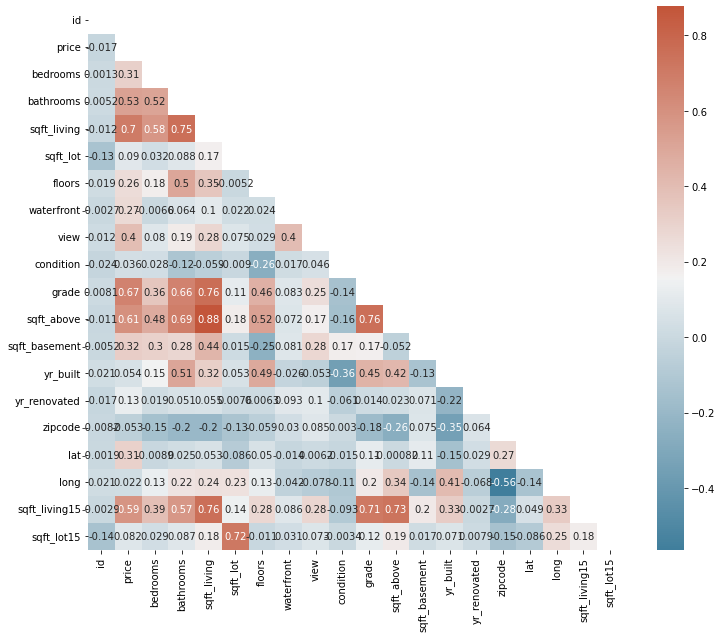

In [52]:
# Correlation between different variables
#
corr = dataset.corr()
#
# Set up the matplotlib plot configuration
#
f, ax = plt.subplots(figsize=(12, 10))
#
# Generate a mask for upper traingle
#
mask = np.triu(np.ones_like(corr, dtype=bool))
#
# Configure a custom diverging colormap
#
cmap = sb.diverging_palette(230, 20, as_cmap=True)
#
# Draw the heatmap
#
sb.heatmap(corr, annot=True, mask = mask, cmap=cmap)

In [53]:
# Drop unnecessarry columns
to_drop = ['date',
           'sqft_lot',
           'waterfront',
          'condition',
          'yr_renovated',
          'zipcode']
dataset.drop(to_drop, inplace=True, axis=1)

In [54]:
dataset.head()

,id,price,bedrooms,bathrooms,sqft_living,floors,view,grade,sqft_above,sqft_basement,yr_built,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,1.0,0,7,1180,0,1955,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,2.0,0,7,2170,400,1951,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,1.0,0,6,770,0,1933,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,1.0,0,7,1050,910,1965,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,1.0,0,8,1680,0,1987,47.6168,-122.045,1800,7503


In [55]:
# 2. Changing Index of DataFrame
dataset['price'].is_unique

False

In [66]:
# 3. Tiding up datafields
dataset['sqft_living']

0        1180
1        2570
2         770
3        1960
4        1680
         ... 
21608    1530
21609    2310
21610    1020
21611    1600
21612    1020
Name: sqft_living, Length: 21613, dtype: int64

In [68]:
# initializing our inputs and outputs
X = dataset['sqft_living'].values
Y = dataset['price'].values
# mean of our inputs and outputs
x_mean = np.mean(X)
y_mean = np.mean(Y)
#total number of values
n = len(X)
# using the formula to calculate the b1 and b0
numerator = 0
denominator = 0
for i in range(n):
    numerator += (X[i] - x_mean) * (Y[i] - y_mean)
    denominator += (X[i] - x_mean) ** 2
    
b1 = numerator / denominator
b0 = y_mean - (b1 * x_mean)
#printing the coefficient
print(b1, b0)


280.6235678974486 -43580.743094474776


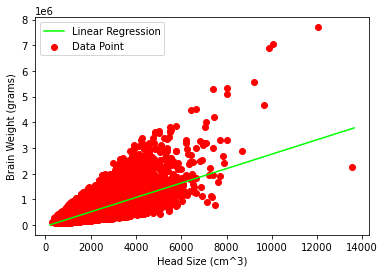

In [69]:
#plotting values 
x_max = np.max(X) + 100
x_min = np.min(X) - 100
#calculating line values of x and y
x = np.linspace(x_min, x_max, 1000)
y = b0 + b1 * x
#plotting line 
plt.plot(x, y, color='#00ff00', label='Linear Regression')
#plot the data point
plt.scatter(X, Y, color='#ff0000', label='Data Point')
# x-axis label
plt.xlabel('Head Size (cm^3)')
#y-axis label
plt.ylabel('Brain Weight (grams)')
plt.legend()
plt.show()

In [70]:
rmse = 0
for i in range(n):
    y_pred=  b0 + b1* X[i]
    rmse += (Y[i] - y_pred) ** 2
    
rmse = np.sqrt(rmse/n)
print(rmse)

261440.79030067218


In [71]:
sumofsquares = 0
sumofresiduals = 0
for i in range(n) :
    y_pred = b0 + b1 * X[i]
    sumofsquares += (Y[i] - y_mean) ** 2
    sumofresiduals += (Y[i] - y_pred) **2
    
score  = 1 - (sumofresiduals/sumofsquares)
print(score)

0.4928532179037912
